In [17]:
# 1. Import libraries and modules
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn import linear_model
import matplotlib.pyplot as plt
#in this practice we going to use below methods Train_test_split
from sklearn.model_selection import train_test_split

In [18]:
#We have a dataset containing prices of used BMW cars. 
#We are going to analyze this dataset and build a prediction function 
#that can predict a price by taking mileage and age of the car as input. 
#We will use sklearn train_test_split method to split training and testing dataset

In [19]:
data = pd.read_csv('E:/ML/Train_Test_splitdata.csv')

In [20]:
data

,Mileage,Age,Sell_PriceUSD,Date
0,69000,6,18000,241015
1,35000,3,34000,241015
2,57000,5,26100,241015
3,22500,2,40000,241015
4,46000,4,31500,241015
5,59000,5,26750,241015
6,52000,5,32000,241015
7,72000,6,19300,241015
8,91000,8,12000,241015
9,67000,6,22000,241015


In [21]:
#get the table inforation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
Mileage          20 non-null int64
Age              20 non-null int64
Sell_PriceUSD    20 non-null int64
Date             20 non-null int64
dtypes: int64(4)
memory usage: 720.0 bytes


In [22]:
# Get the frist 5 row values
data.head()

,Mileage,Age,Sell_PriceUSD,Date
0,69000,6,18000,241015
1,35000,3,34000,241015
2,57000,5,26100,241015
3,22500,2,40000,241015
4,46000,4,31500,241015


In [23]:
# Validate the data values if any null or blank
data.isnull().sum()

Mileage          0
Age              0
Sell_PriceUSD    0
Date             0
dtype: int64

In [24]:
# Car Mileage Vs Sell Price ($)
%matplotlib inline

Text(0,0.5,'Sell_PriceUSD')

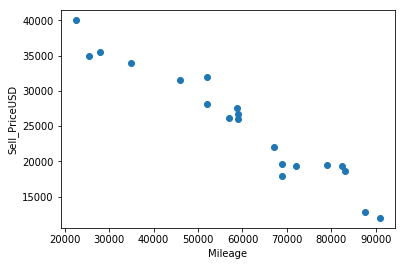

In [25]:
plt.scatter(data['Mileage'],data['Sell_PriceUSD'])
plt.xlabel('Mileage')
plt.ylabel('Sell_PriceUSD')

In [26]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
import matplotlib.pyplot as plt

%matplotlib inline

Text(0,0.5,'Sell_PriceUSD')

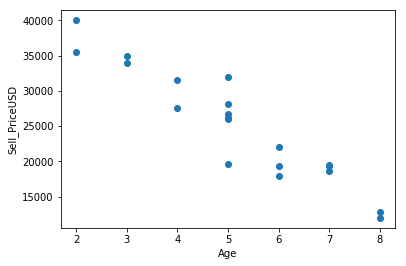

In [28]:
# Car Age vs Sell_ProceUSD
plt.scatter(data['Age'],data['Sell_PriceUSD'])
plt.xlabel('Age')
plt.ylabel('Sell_PriceUSD')
#plt.plot(data.Age,clf.predict(data[['Age']]),color='red')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
Mileage          20 non-null int64
Age              20 non-null int64
Sell_PriceUSD    20 non-null int64
Date             20 non-null int64
dtypes: int64(4)
memory usage: 720.0 bytes


In [30]:
#The approach we are going to use here is to split available data in two sets

# 1. Training: We will train our model on this dataset
# 2. Testing: We will use this subset to make actual predictions using trained model

X = data[['Mileage', 'Age']]
y = data['Sell_PriceUSD']

In [31]:
# now use the Sklearn method 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3)

In [32]:
X_train

,Mileage,Age
19,52000,5
6,52000,5
0,69000,6
15,25400,3
13,58780,4
18,87600,8
11,79000,7
17,69000,5
9,67000,6
5,59000,5


In [33]:
X_test

,Mileage,Age
4,46000,4
1,35000,3
10,83000,7
8,91000,8
7,72000,6
3,22500,2


In [34]:
y_train

19    28200
6     32000
0     18000
15    35000
13    27500
18    12800
11    19500
17    19700
9     22000
5     26750
2     26100
12    26000
14    19400
16    35500
Name: Sell_PriceUSD, dtype: int64

In [35]:
y_test

4     31500
1     34000
10    18700
8     12000
7     19300
3     40000
Name: Sell_PriceUSD, dtype: int64

In [36]:
# Run the linear Regression model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
X_test

,Mileage,Age
4,46000,4
1,35000,3
10,83000,7
8,91000,8
7,72000,6
3,22500,2


In [38]:
clf.predict(X_test)

array([29931.94232583, 33808.03684783, 16981.49834167, 14097.02413328,
       20857.59286368, 38179.94152664])

In [39]:
y_test

4     31500
1     34000
10    18700
8     12000
7     19300
3     40000
Name: Sell_PriceUSD, dtype: int64

In [40]:
clf.score(X_test,y_test)

0.9733308822695783

In [41]:
# Use the Random_state argument
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=10)
X_test

,Mileage,Age
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8
